## Applying gradient descent

### Introduction

In the last lesson, we derived the functions that we help us descend along our cost functions efficiently.  Remember that this technique is not so different from what we saw with using the derivative to tell us our next step size and direction in two dimensions.  

![](./tangent-lines.png)

When descending along our cost curve in two dimensions, we used the slope of the tangent line at each point, to tell us how large of a step to take next.  And with the our cost curve being a function of $m$ and $b$, we had to use the gradient to determine each step.  

![](./gradientdescent.png)

But really it's an analogous approach.  Just like we can calculate the use derivative of a function $f(x)$ to calculate the slope at a given value of $x$ on the graph, and thus our next step.  Here, we calculated the partial derivative with respect to both variables, our slope and y-intercept, to calculate the amount to move next in either direction, and thus to steer us towards our minimum.   

### Reviewing our gradient descent formulas

Luckily for us, we already did the hard work of deriving these formulas.  Now we get to see the fruit of our labor.  The following formulas tell us how to update regression variables of $m$ and $b$ to approach a "best fit" line.   

* $ \frac{dJ}{dm}J(m,b) = -2\sum_{i = 1}^n x(y_i - (mx_i + b)) = -2\sum_{i = 1}^n x_i*\epsilon_i$ 
* $ \frac{dJ}{db}J(m,b) = -2\sum_{i = 1}^n(y_i - (mx_i + b)) = -2\sum_{i = 1}^n \epsilon_i $

Now the formulas above tell us to take some dataset, with values of $x$ and $y$, and then given a regression formula with values $m$ and $b$, iterate through our dataset, and use the formulas to calculate an update to $m$ and $b$.  So ultimately, to descend along the cost function, we will use the calculations:

`current_m` = `old_m` $ -  (-2*\sum_{i=1}^n x_i*\epsilon_i )$

`current_b` =  `old_b` $ - ( -2*\sum_{i=1}^n \epsilon_i )$

Ok let's turn this into code.  First, let's initialize some data.

(100, 2)

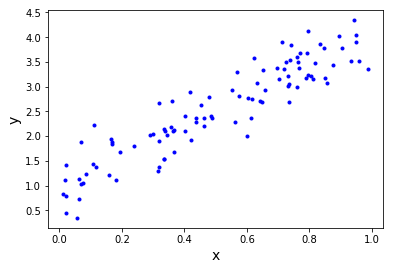

In [299]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11)

X = np.random.rand(100,1).reshape(100)
y_randterm = np.random.normal(0,0.4,100)
y = 1+ 3* X+ y_randterm

plt.plot(X,y, '.b')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

data = np.array([X, y])
data = np.transpose(data)
data.shape

Now we set our initial regression line by initializing $m$ and $b$ variables as zero.  Then to calculate our next step to update our regression line, we iterate through each of the points in the dataset, and at each iteration change our `update_to_b` by $2*\epsilon$ and change our `update_to_m` by $2*x*\epsilon$.

In [300]:
# initial variables of our regression line
b_current = 0
m_current = 0

#amount to update our variables for our next step
update_to_b = 0
update_to_m = 0 

def error_at(point, b, m):
    return (m*point[0] + b - point[1])

for i in range(0, len(data)):
    update_to_b += -2*(error_at(data[i], b_current, m_current))
    update_to_m += -2*(error_at(data[i], b_current, m_current)*data[i][0])

new_b = b_current - update_to_b
new_m = m_current - update_to_m

In the last two lines of the code above, we calculate our `new_b` and `new_m` values by updating our taking our current values and adding our respective updates.  We define a function called `error_at`, which we can use in the error component of our partial derivatives above.

The code above represents **just one** update to our regression line, and therefore just one step towards our best fit line.  We'll just repeat the process to take multiple steps.  But first we have to make a couple other changes. 

### Tweaking our approach 

Ok, the above code is very close to what we want, but we just need to make tweaks to our code before it's perfect.

The first one is obvious if we think about what these formulas are really telling us to do.  Look at the graph below, and think about what it means to change each of our $m$ and $b$ variables by at least the sum of all of the errors, of the $y$ values that our regression line predicts and our actual data.  That would be an enormous change.  To ensure that we drastically updating our regression line with each step, we multiply each of these partial derivatives by a learning rate.  As we have seen before, the learning rate is just a small number, like $.0001$ which controls for how large our updates to the regression line will be.  The learning rate is  represented by the Greek letter eta, $\eta$, or alpha $\alpha$.  We'll use eta, so $\eta = .0001$ means the learning rate is $.0001$.

Multiplying our step size by our learning rate works fine, so long as we multiply both of the partial derivatives by the same amount.  This is because with out gradient,  $ \nabla J(m,b)$, we think of as steering us in the correct direction.  In other words, our derivatives ensure we are make the correct **proportional** changes to $m$ and $b$.  So scaling down these changes to make sure we don't update our regression line too quickly works fine, so long as we keep me moving in the correct direction.  While were at it, we can also get rid of multiplying our partials by 2.  As mentioned, so long as our changes are proportional we're in good shape. 

![](./regression-scatter.png)

For our second tweak, note that in general the larger the dataset, the larger the sum of our errors would be.  But that doesn't mean our formulas are less accurate, and there deserve larger changes.  It just means that the total error is larger.  But we should really think accuracy as being proportional to the size of our dataset.  We can correct for this effect by dividing the effect of our update by the size of our dataset, $n$.

Making these changes, our formula looks like the following:

In [301]:
#amount to update our variables for our next step
update_to_b = 0
update_to_m = 0 

learning_rate = .01
n = len(shows)
for i in range(0, n):
    update_to_b += -(1/n)*(error_at(data[i], b_current, m_current))
    update_to_m += -(1/n)*(error_at(data[i], b_current, m_current)*data[i][0])

new_b = b_current - (learning_rate*update_to_b)
new_m = m_current - (learning_rate*update_to_m)

So our code now reflects what we know about our gradient descent process.  Start with an initial regression line with values of $m$ and $b$.  Then for each point, calculate how the regression line fares against the actual point (that is, find the error).  Update what our next step to the respective variable should be using by using the partial derivative.  And after iterating through all of the points, update the value of $b$ and $m$ appropriately, scaled down by a learning rate.

### Seeing our gradient descent formulas in action

As mentioned earlier, the code above represents just one update to our regression line, and therefore just one step towards our best fit line.  To take multiple steps we wrap the process we want to duplicate in a function called `step_gradient` and then can call that function as much as we want. 

In [358]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11)

X = np.random.rand(100,1).reshape(100)
y_randterm = np.random.normal(0,1,100)
y = 1+ 3 * X+ y_randterm

data = np.array([X, y])
data = np.transpose(data)

def step_gradient(b_current, m_current, points):
    b_gradient = 0
    m_gradient = 0
    learning_rate = .2
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i][0]
        y = points[i][1]
        b_gradient += -(1/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(1/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return {'b': new_b, 'm': new_m}

In [359]:
b = 0
m = 0

step_gradient(b, m, data) # {'b': 0.0085, 'm': 0.6249999999999999}

{'b': 0.5137192511719382, 'm': 0.31105978929618217}

So just looking at input and output, we begin by setting $b$ and $m$ to 0, 0.  Then from our step_gradient function, we receive new values of $b$ and $m$ of .0085 and .6245.  Now what we need to do, is take another step in the correct direction by calling our step gradient function with our updated values of $b$ and $m$.

In [360]:
updated_b = 0.03074749607841602
updated_m = 0.0189158913379435
step_gradient(updated_b, updated_m, data) # {'b': 0.01345805, 'm': 0.9894768333333332}

{'b': 0.5364023796733859, 'm': 0.32559084526484994}

Let's do this, say, 10 times.

In [367]:
# set our initial step with m and b values, and the corresponding error.
b = 0
m = 0
iterations = []
for i in range(200):
    iteration = step_gradient(b, m, data)
    # {'b': value, 'm': value}
    b = iteration['b']
    m = iteration['m']
    # update values of b and m
    iterations.append(iteration)

Let's take a look at these iterations.

In [368]:
iterations[199]

{'b': 1.0447316171444574, 'm': 3.021705936111765}

As you can see, our $m$ and $b$ values both update with each step.  Not only that, but with each step, the size of the changes to $m$ and $b$ decrease.  This is because they are approaching a best fit line.

###  Animating these changes

We can use Plotly to see these changes to our regression line visually.  We'll write a method called `to_line` that takes a dictionary of $m$ and $b$ variables and changes it to produce a line object.  We can then see our line changes over time. 

In [296]:
def to_line(m, b):
    initial_x = 0
    ending_x = 100
    initial_y = m*initial_x + b
    ending_y = m*ending_x + b
    return {'data': [{'x': [initial_x, ending_x], 'y': [initial_y, ending_y]}]}

frames = list(map(lambda iteration: to_line(iteration['m'], iteration['b']),iterations))
frames[0]

{'data': [{'x': [0, 100], 'y': [0.2568596255859691, 15.809849090395078]}]}

Now we can see how our regression line changes, and approaches our data, with each iteration.

In [298]:
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

init_notebook_mode(connected=True)

x_values_of_shows = list(map(lambda show: show['x'], shows))
y_values_of_shows = list(map(lambda show: show['y'], shows))
figure = {'data': [{'x': [0], 'y': [0]}, {'x': x_values_of_shows, 'y': y_values_of_shows, 'mode': 'markers'}],
          'layout': {'xaxis': {'range': [0, 110], 'autorange': False},
                     'yaxis': {'range': [0,160], 'autorange': False},
                     'title': 'Regression Line',
                     'updatemenus': [{'type': 'buttons',
                                      'buttons': [{'label': 'Play',
                                                   'method': 'animate',
                                                   'args': [None]}]}]
                    },
          'frames': frames}
iplot(figure)

As you can see, our regression line starts off far away from our cost curve.  But it uses our `step_gradient` function to move closer to finding the line that produces the lowest error.

### Summary

In this section, we saw our gradient descent formulas in action.  The core of the gradient descent functions are understanding the two lines: 

$$ \frac{dJ}{dm}J(m,b) = -2\sum_{i = 1}^n x(y_i - (mx_i + b)) = -2\sum_{i = 1}^n x_i*\epsilon_i$$
$$ \frac{dJ}{db}J(m,b) = -2\sum_{i = 1}^n(y_i - (mx_i + b)) = -2\sum_{i = 1}^n \epsilon_i $$
    
Which both look to the errors of the current regression line for our dataset to determine how to update the regression line next.  These formulas came from our cost function, $J(m,b) = \sum_{i = 1}^n(y_i - (mx_i + b))^2 $, and using the gradient to find the direction of steepest descent.  Translating this into code, and seeing how the regression line continued to improve in alignment with the data, we saw the effectiveness of this technique in practice.  